# TITANIC PREDICTION
By Gokul Ravi K

Dataset Link-https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

 **DATASET DESCRIPTION**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Importing required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the Dataset**

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking the shape

In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Total Null Valus in the Dataset

In [ ]:
df.isnull().sum().sum()

866

# Dropping Unwanted Columns

In [ ]:
df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**More People died than Survived.**

<Axes: xlabel='Survived', ylabel='count'>

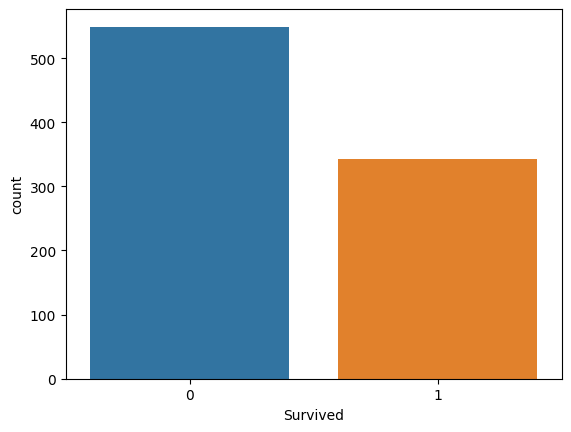

In [ ]:
sns.countplot(x='Survived',data=df)

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Most of the men died than the women**

<Axes: xlabel='Survived', ylabel='count'>

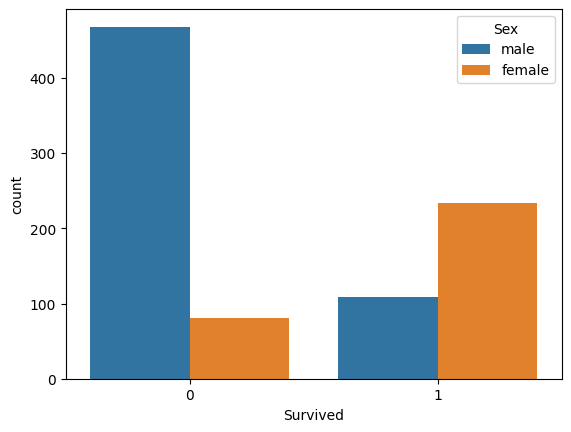

In [ ]:
sns.countplot(x='Survived',hue = "Sex",data=df)

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**The 3rd Class people Died more than the two classes.**

<Axes: xlabel='Survived', ylabel='count'>

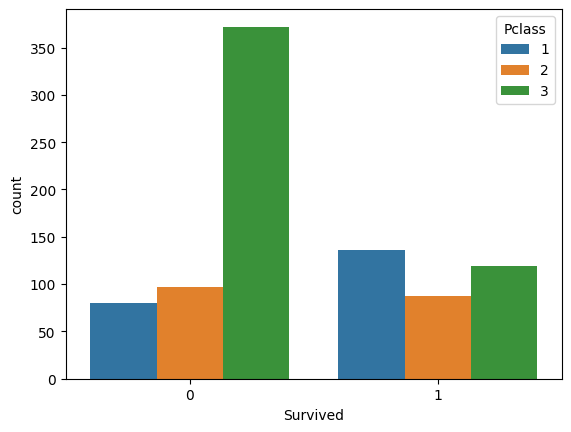

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=df)

**Most of the people age ranges from 18 to 40**

<Axes: >

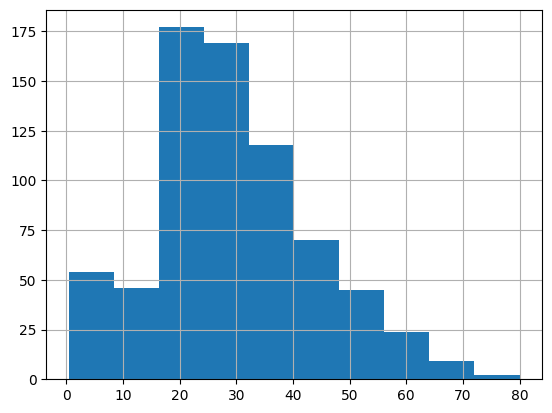

In [ ]:
df['Age'].hist()

**Filling the null values of Age and Embarked**

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Removing the duplicates**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(780, 8)

In [ ]:
dummies=['Sex','Embarked']
dummy_data=pd.get_dummies(df[dummies])

In [ ]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sex_female  780 non-null    uint8
 1   Sex_male    780 non-null    uint8
 2   Embarked_C  780 non-null    uint8
 3   Embarked_Q  780 non-null    uint8
 4   Embarked_S  780 non-null    uint8
dtypes: uint8(5)
memory usage: 9.9 KB


In [ ]:
df1=pd.concat([df, dummy_data], axis = 1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    780 non-null    int64  
 1   Pclass      780 non-null    int64  
 2   Sex         780 non-null    object 
 3   Age         780 non-null    float64
 4   SibSp       780 non-null    int64  
 5   Parch       780 non-null    int64  
 6   Fare        780 non-null    float64
 7   Embarked    780 non-null    object 
 8   Sex_female  780 non-null    uint8  
 9   Sex_male    780 non-null    uint8  
 10  Embarked_C  780 non-null    uint8  
 11  Embarked_Q  780 non-null    uint8  
 12  Embarked_S  780 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(5)
memory usage: 58.7+ KB


In [ ]:
df1.drop(['Sex','Embarked'],inplace=True,axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    780 non-null    int64  
 1   Pclass      780 non-null    int64  
 2   Age         780 non-null    float64
 3   SibSp       780 non-null    int64  
 4   Parch       780 non-null    int64  
 5   Fare        780 non-null    float64
 6   Sex_female  780 non-null    uint8  
 7   Sex_male    780 non-null    uint8  
 8   Embarked_C  780 non-null    uint8  
 9   Embarked_Q  780 non-null    uint8  
 10  Embarked_S  780 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.5 KB


**Removing the Outliers**

In [ ]:
for i in [i for i in df1.columns]:
    if df1[i].nunique()>=12:
        Q1 = df1[i].quantile(0.20)
        Q3 = df1[i].quantile(0.80)
        IQR = Q3 - Q1
        IQR = Q3 - Q1
        df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
        df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
df1 = df1.reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    729 non-null    int64  
 1   Pclass      729 non-null    int64  
 2   Age         729 non-null    float64
 3   SibSp       729 non-null    int64  
 4   Parch       729 non-null    int64  
 5   Fare        729 non-null    float64
 6   Sex_female  729 non-null    uint8  
 7   Sex_male    729 non-null    uint8  
 8   Embarked_C  729 non-null    uint8  
 9   Embarked_Q  729 non-null    uint8  
 10  Embarked_S  729 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 37.9 KB


In [ ]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.299547,-0.097214,-0.048717,0.063061,0.258537,0.497454,-0.497454,0.149582,-0.026978,-0.114196
Pclass,-0.299547,1.000000,-0.362887,0.109717,0.116855,-0.675628,-0.070031,0.070031,-0.201929,0.197720,0.054382
Age,-0.097214,-0.362887,1.000000,-0.282478,-0.201368,0.148172,-0.101868,0.101868,0.026121,-0.013065,-0.014774
SibSp,-0.048717,0.109717,-0.282478,1.000000,0.378100,0.273972,0.095360,-0.095360,-0.059000,-0.000377,0.051858
Parch,0.063061,0.116855,-0.201368,0.378100,1.000000,0.161138,0.254199,-0.254199,-0.029632,-0.057088,0.061242
Fare,0.258537,-0.675628,0.148172,0.273972,0.161138,1.000000,0.174125,-0.174125,0.232934,-0.127028,-0.125240
Sex_female,0.497454,-0.070031,-0.101868,0.095360,0.254199,0.174125,1.000000,-1.000000,0.064601,0.056236,-0.091312
Sex_male,-0.497454,0.070031,0.101868,-0.095360,-0.254199,-0.174125,-1.000000,1.000000,-0.064601,-0.056236,0.091312
Embarked_C,0.149582,-0.201929,0.026121,-0.059000,-0.029632,0.232934,0.064601,-0.064601,1.000000,-0.136965,-0.790275
Embarked_Q,-0.026978,0.197720,-0.013065,-0.000377,-0.057088,-0.127028,0.056236,-0.056236,-0.136965,1.000000,-0.498738


<Axes: >

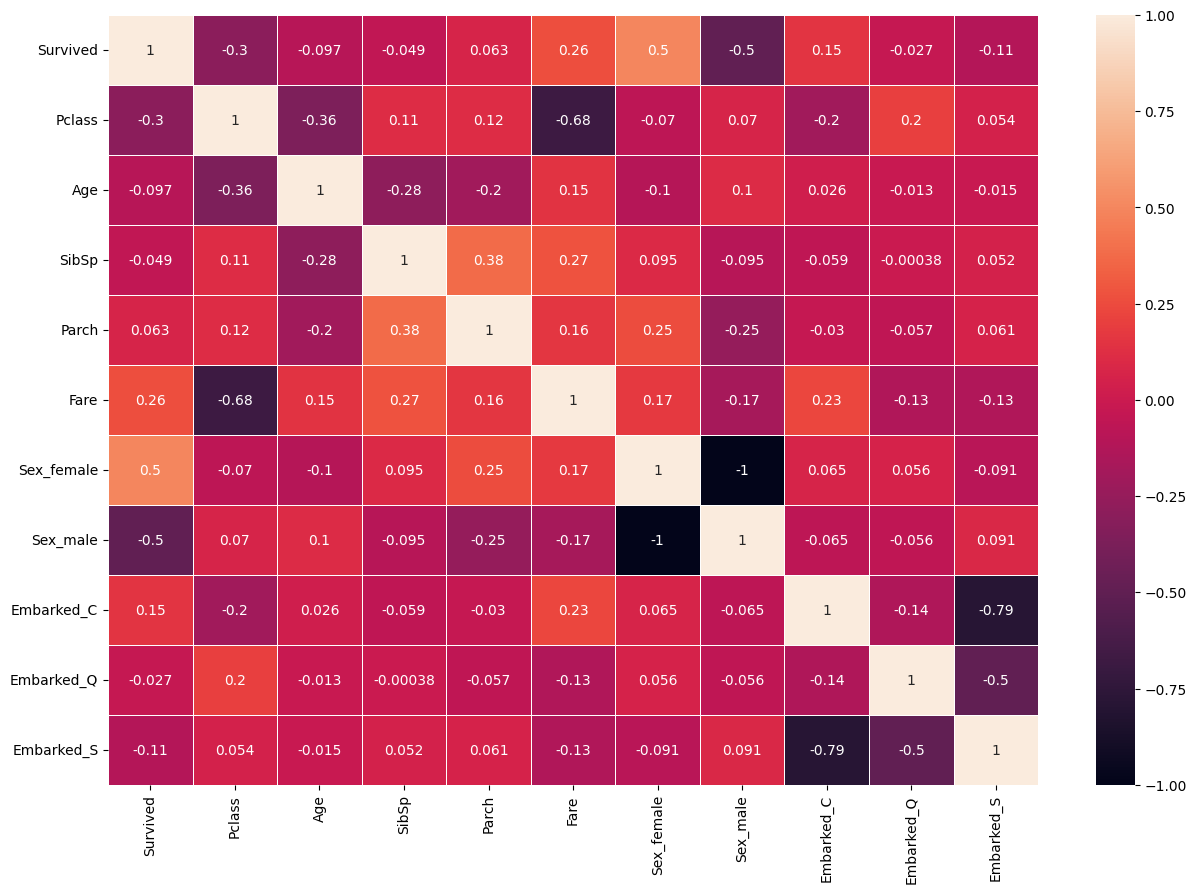

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, linewidths=.5)

**Model Building**

In [ ]:
x=df1.drop(['Survived'],axis=1)
y=df1['Survived']

In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=202)
print('Train_set:',x_train.shape,y_train.shape)
print('Test_set:',x_test.shape,y_test.shape)

Train_set: (583, 10) (583,)
Test_set: (146, 10) (146,)


# ***Logistic Regression,KNN, SVM, Decision Tree, RandomForest***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
#Fit the logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(x_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(x_test)

#Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50)
svcmodel.fit(x_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(x_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

In [ ]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(x_train, y_train)

#Predict the value for new, unseen data
knn_pred = knnmodel.predict(x_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [ ]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(x_train, y_train)

#Predict the value for new, unseen data
dt_pred = dtmodel.predict(x_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [ ]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(x_train, y_train)

#Predict the value for new, unseen data
rf_pred = rfmodel.predict(x_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

 **MODEL COMPARISON**

In [ ]:
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor',
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy,
              dt_accuracy, rf_accuracy]})

Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)

Model_Comparison_df = Model_Comparison_df[['Model', 'Score']]

Model_Comparison_df = Model_Comparison_df.reset_index(drop=True)

print(Model_Comparison_df)

                    Model  Score
0           Random Forest  78.08
1     Logistic Regression  77.40
2  Support Vector Machine  75.34
3           Decision Tree  73.29
4      K-Nearest Neighbor  65.75
